# Hypothesis Testing with Mice Drug Regimen
The objective of this notebook is to use Hypothesis Testing with p-values to determine the effectiveness of the drug Ramicane at reducing tumor size in mice.




## Import Dependencies

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

## Defining a function to generate p-values from the arrays being tested

In [27]:
def p_value(sample_array, population_array, tails=2):
    
    sample_mean = np.average(sample_array)
    mu = np.average(population_array)
    variance = np.var(population_array)
    sigma = math.sqrt(variance)
    
    z_score = (sample_mean - mu) / sigma
    
    psr = [mu - (abs(z_score) * sigma), mu + (abs(z_score) * sigma)]
    
    pop_score = 0
    
    for item in population_array:
        if item > psr[0] and item < psr[1]:
            pop_score += 1
    pop_percent = pop_score/len(population_array)
    
    pvalue = 1 - pop_percent
    
    if tails == 1:
        pvalue = pvalue / 2
    return {"p-value": pvalue, "z-score": z_score}

## Importing the Drug Study CSV

In [6]:
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseandstudy_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouseandstudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
mouseandstudy_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

## Generating stats for Mouse Placebo population

In [8]:
PlaceboDF = mouseandstudy_df[mouseandstudy_df['Drug Regimen'] == "Placebo"].reset_index()

### Display change in mean of key values aross time

In [9]:
placedo_mean_df = PlaceboDF.groupby("Timepoint").mean()
placedo_mean_df

,index,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,
0,1227.560000,10.680000,28.040000,45.000000,0.000000
5,1231.250000,10.333333,27.958333,47.125589,0.375000
10,1232.250000,10.333333,27.958333,49.423329,0.833333
15,1193.700000,10.300000,28.200000,51.359742,1.250000
20,1179.684211,10.578947,28.105263,54.364417,1.526316
25,1168.941176,10.647059,27.882353,57.482574,1.941176
30,1161.400000,10.600000,27.800000,59.809063,2.266667
35,1154.857143,11.214286,27.714286,62.420615,2.642857
40,1089.833333,12.166667,27.500000,65.052675,3.166667


### Display change in standard deviation of key values aross time

In [10]:
PlaceboDF.groupby("Timepoint").std()

,index,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,
0,408.528771,6.587362,1.946792,0.000000,0.000000
5,417.089110,6.491912,1.944427,1.068422,0.494535
10,417.089110,6.491912,1.944427,1.969702,0.564660
15,428.994062,6.358583,1.823819,2.747955,0.850696
20,435.316112,6.405864,1.822536,3.659772,1.020263
25,448.114588,6.642112,1.798692,4.266887,1.088037
30,467.757233,6.587868,1.820518,4.718189,1.162919
35,484.467012,6.375175,1.857565,4.817311,1.277446
40,491.082447,6.407855,1.882938,4.748016,1.029857


In [11]:
Time_min = PlaceboDF['Timepoint'].min()
Time_max = PlaceboDF['Timepoint'].max()

# Stats for time=0
P_tv_t0 = PlaceboDF[PlaceboDF['Timepoint'] == Time_min]['Tumor Volume (mm3)']
P_tv_mean_t0 = P_tv_t0.describe()[1]
P_tv_std_t0 = P_tv_t0.describe()[2]
P_tv_n_t0 = P_tv_t0.describe()[0]

# Stats for time=45
P_tv_t45 = PlaceboDF[PlaceboDF['Timepoint'] == Time_max]['Tumor Volume (mm3)']
P_tv_mean_t45 = P_tv_t45.describe()[1]
P_tv_std_t45 = P_tv_t45.describe()[2]
P_tv_n_t45 = P_tv_t45.describe()[0]

Initial tumor volume mean: 45.0
Final tumor volume mean: 68.08408221818182
Delta tumor volume mean: 23.08408221818182


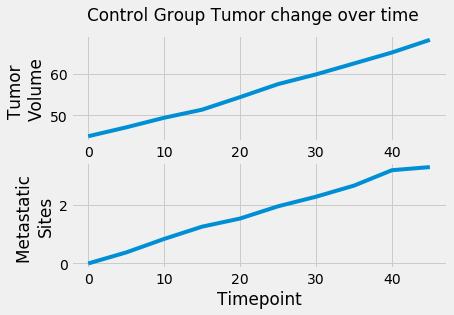

In [12]:
plt.style.use('fivethirtyeight')

x_axis = placedo_mean_df.index
y_tum_vol = placedo_mean_df['Tumor Volume (mm3)']
y_met_sites = placedo_mean_df['Metastatic Sites']

fig, axs = plt.subplots(2)
fig.suptitle('Control Group Tumor change over time')
axs[0].plot(x_axis, y_tum_vol)
axs[0].set(ylabel="Tumor \nVolume")
axs[1].plot(x_axis, y_met_sites)
axs[1].set(ylabel="Metastatic \nSites", xlabel="Timepoint")

print(f"Initial tumor volume mean: {P_tv_mean_t0}")
print(f"Final tumor volume mean: {P_tv_mean_t45}")
print(f"Delta tumor volume mean: {P_tv_mean_t45 - P_tv_mean_t0}")
plt.show()

## Generate stats for Mice treated with Ramicane

In [13]:
RamicaneDF = mouseandstudy_df[mouseandstudy_df['Drug Regimen'] == "Ramicane"].reset_index()

### Display change in mean of key values aross time

In [14]:
ramicane_mean_df = RamicaneDF.groupby("Timepoint").mean()
ramicane_mean_df

,index,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,
0,233.880000,10.840000,20.000000,45.000000,0.000000
5,234.880000,10.840000,20.000000,43.944859,0.120000
10,226.958333,11.083333,19.833333,42.531957,0.250000
15,227.958333,11.083333,19.833333,41.495061,0.333333
20,219.173913,10.739130,19.652174,40.238325,0.347826
25,220.173913,10.739130,19.652174,38.974300,0.652174
30,221.173913,10.739130,19.652174,38.703137,0.782609
35,208.190476,10.428571,19.380952,37.451996,0.952381
40,206.500000,10.050000,19.300000,36.574081,1.100000


In [15]:
Time_min = RamicaneDF['Timepoint'].min()
Time_max = RamicaneDF['Timepoint'].max()

# Stats for time=0
R_tv_t0 = RamicaneDF[RamicaneDF['Timepoint'] == Time_min]['Tumor Volume (mm3)']
R_tv_mean_t0 = R_tv_t0.describe()[1]
R_tv_std_t0 = R_tv_t0.describe()[2]
R_tv_n_t0 = R_tv_t0.describe()[0]

# Stats for time=45
R_tv_t45 = RamicaneDF[RamicaneDF['Timepoint'] == Time_max]['Tumor Volume (mm3)']
R_tv_mean_t45 = R_tv_t45.describe()[1]
R_tv_std_t45 = R_tv_t45.describe()[2]
R_tv_n_t45 = R_tv_t45.describe()[0]

Initial tumor volume mean: 45.0
Final tumor volume mean: 34.955594792
Delta tumor volume mean: -10.044405208


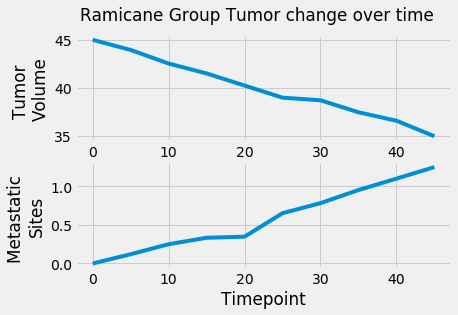

In [16]:
plt.style.use('fivethirtyeight')

x_axis = ramicane_mean_df.index
y_tum_vol = ramicane_mean_df['Tumor Volume (mm3)']
y_met_sites = ramicane_mean_df['Metastatic Sites']

fig, axs = plt.subplots(2)
fig.suptitle('Ramicane Group Tumor change over time')
axs[0].plot(x_axis, y_tum_vol)
axs[0].set(ylabel="Tumor \nVolume")
axs[1].plot(x_axis, y_met_sites)
axs[1].set(ylabel="Metastatic \nSites", xlabel="Timepoint")

print(f"Initial tumor volume mean: {R_tv_mean_t0}")
print(f"Final tumor volume mean: {R_tv_mean_t45}")
print(f"Delta tumor volume mean: {R_tv_mean_t45 - R_tv_mean_t0}")
plt.show()

Comparing this chart to the one above displays a clear downward trend in tumor volume for mice treated with Ramicane. However, we cannot know from simply seeing this how significant this result is. It may be able to be accounted for with violating the null hypothesis. To determine this, we will use the p-value to determine the result's level of significance.

## Use P-value to determine similarity of starting data for both Drug Regimens.
Before we can compare the final results for each regimen, we must first ensure 

In [35]:
Time_min = RamicaneDF['Timepoint'].min()
Time_max = RamicaneDF['Timepoint'].max()
Ram_tv_t0 = RamicaneDF[RamicaneDF['Timepoint'] == Time_min]['Tumor Volume (mm3)']
Ram_tv_t0.describe()

count    25.0
mean     45.0
std       0.0
min      45.0
25%      45.0
50%      45.0
75%      45.0
max      45.0
Name: Tumor Volume (mm3), dtype: float64

In [36]:
p_value(Ram_tv_t0, P_tv_t0)

C:\Users\farad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


{'p-value': 1.0, 'z-score': nan}

The p-value is 1.0, meaning the starting tumor size for both Regimens is exactly overlayed.

## Define Hypotheses and statistical significance to look for

X̄<sub>TV</sub> = Ramicane tumor volume\
μ<sub>TV</sub> = Placebo tumor volume\
t = Time

### H<sub>0</sub>: X̄<sub>TV at t=45</sub> = μ<sub>TV at t=45</sub>
The Null Hypothesis assumes there will be no difference between the Ramicane tumor volume (TV) average and the Placebo average at t=45.

### H<sub>A</sub>: X̄<sub>TV at t=45</sub> != μ<sub>TV at t=45</sub>
The Alternative Hypothesis assumes there will be a difference between the Ramicane tumor volume (TV) average and the Placebo average at t=45.

### Significance Level (sig_lev) is set to 5%.

In [37]:
sig_lev = 0.05

## Analyzing the results

In [39]:
Ram_tv_t45 = RamicaneDF[RamicaneDF['Timepoint'] == Time_max]['Tumor Volume (mm3)']
Ram_tv_mean_t45 = Ram_tv_t45.describe()[1]
print(f'Ramicane final tumor volume: {Ram_tv_mean_t45}')
print(f'Placebo final tumor volume: {P_tv_mean_t45}')

Ramicane final tumor volume: 34.955594792
Placebo final tumor volume: 68.08408221818182


In [40]:
p_value(Ram_tv_t45, P_tv_t45)

{'p-value': 0.0, 'z-score': -7.750202856867518}

-7.750202856867518/2 = -3.875 for 1 talied distribulion for a p-value of less than 0.0001, meaning we would expect to see a result like this in 0.01% of all experiments assuming the null hypothesis.

Z-score and p-value are extremely low, well below the 5% significance level. We reject the Null Hypothesis that the drug has no effect.